# Importando todas as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Analisando o grupo http://dados.ufrn.br/group/ensino

In [2]:
# Turmas 2017.2
# http://dados.ufrn.br/dataset/turmas
 
# turmas
#turmas_url = 'http://bit.do/turmas_ufrn_2017_2'
#turmas = pd.read_csv(turmas_url, sep=';')

# matrículas em componentes em 2017.2
#notas_url = 'http://bit.do/notas_ufrn_2017_2'
#notas = pd.read_csv(notas1_url, sep=';')

# componentes curriculares presenciais
# foi realizado um filtro apenas por colunas mais importantes pois por alguma razão o dataset estava com erro
#disciplinas_url = 'http://bit.do/componentes_curriculares_ufrn'
#disciplinas = pd.read_csv(disciplinas_url, sep=';', 
#                          usecols=['id_componente','codigo','nivel','nome','unidade_responsavel'])

# docentes da ufrn atualizado em 2018
docentes_url = 'http://bit.do/docentes_ufrn_2018'
docentes = pd.read_csv(docentes_url, sep=';')

# matrículas em componentes em 2017.1
#notas_url = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/79071c21-e32c-438f-b930-d1b6ccc02ec2/download/matricula-componente-20171'
notas_url = 'dados/matricula-componente-20171'
notas = pd.read_csv(notas_url, sep=';')

# avaliacoes dos docentes da ufrn
#avaliacoes_url = 'http://dados.ufrn.br/dataset/d5723d75-7e6e-4264-82aa-b96909b69f63/resource/7accd1d2-2793-460e-b98d-87a0679b9155/download/avaliacaodocencia.csv'
avaliacoes_url = 'dados/avaliacaodocencia.csv'
avaliacoes = pd.read_csv(avaliacoes_url, sep=';')


# Preparação e Limpeza dos Dados

In [3]:
# removendo notas nulas ou repitidas
notas = notas[notas.media_final.notnull()]
notas = notas[~notas[['discente','id_turma']].duplicated()]

# removendo discentes(matriculas) que não realizam avaliações
notas = notas[notas.descricao != 'CANCELADO']
notas = notas[notas.descricao != 'CUMPRIU']
notas = notas[notas.descricao != 'DISPENSADO']
notas = notas[notas.descricao != 'DESISTENCIA']
notas = notas[notas.descricao != 'MATRICULADO']
notas = notas[notas.descricao != 'TRANCADO']
notas = notas[notas.descricao != 'EXCLUIDA']

# unificando em aprovados e reprovados
notas.loc[notas.descricao == 'APROVADO POR NOTA', 'descricao'] = 'APROVADO'
notas.loc[notas.descricao == 'REPROVADO POR MÉDIA E POR FALTAS', 'descricao'] = 'REPROVADO'
notas.loc[notas.descricao == 'REPROVADO POR NOTA E FALTA', 'descricao'] = 'REPROVADO'
notas.loc[notas.descricao == 'REPROVADO POR NOTA', 'descricao'] = 'REPROVADO'
notas.loc[notas.descricao == 'REPROVADO POR FALTAS', 'descricao'] = 'REPROVADO'

notas

,id_turma,discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao
0,57597218,880d7ee5080d3b969bf45556f95ac6b4,2000057.0,1.0,8.7,f,0.0,8.9,0.0,APROVADO
3,57597218,07feb1dc40e26ad43ecb18608f102c49,2000057.0,1.0,8.1,f,0.0,9.0,0.0,APROVADO
6,57597218,4b7f3472e6cb49c22d608494a87e3743,2000057.0,3.0,0.0,f,0.0,0.0,0.0,REPROVADO
9,57597218,bdc55e5eb26a7b26d8b9a9351a006581,2000057.0,3.0,10.0,f,0.0,9.6,0.0,APROVADO
13,57597218,b83369657a8d12b026bb0d50b51842c6,2000057.0,1.0,8.5,f,0.0,9.5,0.0,APROVADO
16,57597218,fd1dadf10ed2f78de12d678d140b7af0,2000057.0,3.0,5.5,f,0.0,6.8,0.0,APROVADO
19,57597218,71ae21e953148a06a413cb9aabf34512,2000057.0,3.0,10.0,f,0.0,9.8,0.0,APROVADO
22,57597218,bffb4eb3d59998051e0c91068f5d46a1,2000057.0,3.0,0.0,f,0.0,2.0,0.0,REPROVADO
25,57597218,966161ee6290ca765610b2047fb650d0,111635069.0,2.0,8.3,f,0.0,8.4,0.0,APROVADO
28,57597218,cd0227358f5de2f2a1deaad1ca93d238,2000057.0,3.0,7.0,f,0.0,7.0,0.0,APROVADO


In [4]:
# limitando avaliações de docentes do IMD
avaliacoes = avaliacoes[avaliacoes.id_docente.isin(docentes[docentes.lotacao == 'INSTITUTO METROPOLE DIGITAL'].id_servidor)]

# limitando avaliações para 2017.1
avaliacoes = avaliacoes[avaliacoes.ano == 2017]
avaliacoes = avaliacoes[avaliacoes.periodo == 1]

avaliacoes

,id_docente,nome_docente,id_turma,ano,periodo,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP
35236,5754613,FREDERICO ARAUJO DA SILVA LOPES,57597049,2017,1,27,9.70,0.66,9.48,1.22,8.66,1.80
36574,5755108,CARLOS EDUARDO DA SILVA,57597962,2017,1,31,9.87,0.35,9.03,1.79,8.87,1.90
36575,5755108,CARLOS EDUARDO DA SILVA,57598004,2017,1,20,9.70,0.80,8.63,2.17,8.77,1.84
36942,5755274,BRUNO SANTANA DA SILVA,57598066,2017,1,35,10.00,0.00,9.32,1.58,8.52,1.78
36943,5755274,BRUNO SANTANA DA SILVA,57598070,2017,1,37,9.69,0.89,9.41,1.17,8.79,1.62
36963,5755281,ADJA FERREIRA DE ANDRADE,57597126,2017,1,59,9.85,0.71,9.29,1.35,8.21,2.16
36964,5755281,ADJA FERREIRA DE ANDRADE,57597128,2017,1,49,9.71,0.65,9.65,0.77,8.52,2.00
36965,5755281,ADJA FERREIRA DE ANDRADE,57598069,2017,1,26,9.54,0.95,9.36,1.04,9.03,1.56
37301,5755402,JOAO CARLOS XAVIER JUNIOR,57597942,2017,1,22,10.00,0.00,9.38,1.39,8.89,1.41
37302,5755402,JOAO CARLOS XAVIER JUNIOR,57597996,2017,1,8,10.00,0.00,9.33,1.13,8.62,1.40


## Calcular dados das avaliações dos professores

In [5]:
# criando as colunas e gerando seus valores
avaliacoes['media_discentes'] = 0
avaliacoes['nota_min'] = 0
avaliacoes['nota_max'] = 0
avaliacoes['nota_med'] = 0
avaliacoes['percentual_aprovados'] = 0

for turma in avaliacoes.id_turma:
    discentes = notas[notas.id_turma == turma]
    if(len(discentes) > 0):
        avaliacoes.loc[avaliacoes.id_turma == turma,'media_discentes'] = discentes.media_final.sum() / len(discentes)
        avaliacoes.loc[avaliacoes.id_turma == turma,'nota_min'] = discentes.media_final.min()
        avaliacoes.loc[avaliacoes.id_turma == turma,'nota_max'] = discentes.media_final.max()
        avaliacoes.loc[avaliacoes.id_turma == turma,'nota_med'] = discentes.media_final.median()
        avaliacoes.loc[avaliacoes.id_turma == turma,
                       'percentual_aprovados'] = len(discentes[discentes.descricao == 'APROVADO']) * 100 / len(discentes)

avaliacoes

,id_docente,nome_docente,id_turma,ano,periodo,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP,media_discentes,nota_min,nota_max,nota_med,percentual_aprovados
35236,5754613,FREDERICO ARAUJO DA SILVA LOPES,57597049,2017,1,27,9.70,0.66,9.48,1.22,8.66,1.80,7.911111,5.4,9.7,8.30,100.000000
36574,5755108,CARLOS EDUARDO DA SILVA,57597962,2017,1,31,9.87,0.35,9.03,1.79,8.87,1.90,4.948387,0.0,7.9,5.30,77.419355
36575,5755108,CARLOS EDUARDO DA SILVA,57598004,2017,1,20,9.70,0.80,8.63,2.17,8.77,1.84,6.280000,1.1,9.0,6.75,90.000000
36942,5755274,BRUNO SANTANA DA SILVA,57598066,2017,1,35,10.00,0.00,9.32,1.58,8.52,1.78,5.080000,0.3,10.0,5.40,54.285714
36943,5755274,BRUNO SANTANA DA SILVA,57598070,2017,1,37,9.69,0.89,9.41,1.17,8.79,1.62,6.862162,0.0,10.0,7.90,83.783784
36963,5755281,ADJA FERREIRA DE ANDRADE,57597126,2017,1,59,9.85,0.71,9.29,1.35,8.21,2.16,7.935593,0.0,10.0,9.30,84.745763
36964,5755281,ADJA FERREIRA DE ANDRADE,57597128,2017,1,49,9.71,0.65,9.65,0.77,8.52,2.00,9.083673,4.9,9.9,9.30,97.959184
36965,5755281,ADJA FERREIRA DE ANDRADE,57598069,2017,1,26,9.54,0.95,9.36,1.04,9.03,1.56,7.838462,1.7,9.7,8.05,96.153846
37301,5755402,JOAO CARLOS XAVIER JUNIOR,57597942,2017,1,22,10.00,0.00,9.38,1.39,8.89,1.41,5.936364,1.4,7.8,6.00,90.909091
37302,5755402,JOAO CARLOS XAVIER JUNIOR,57597996,2017,1,8,10.00,0.00,9.33,1.13,8.62,1.40,4.912500,0.0,8.0,5.85,62.500000


## Análise Grafica

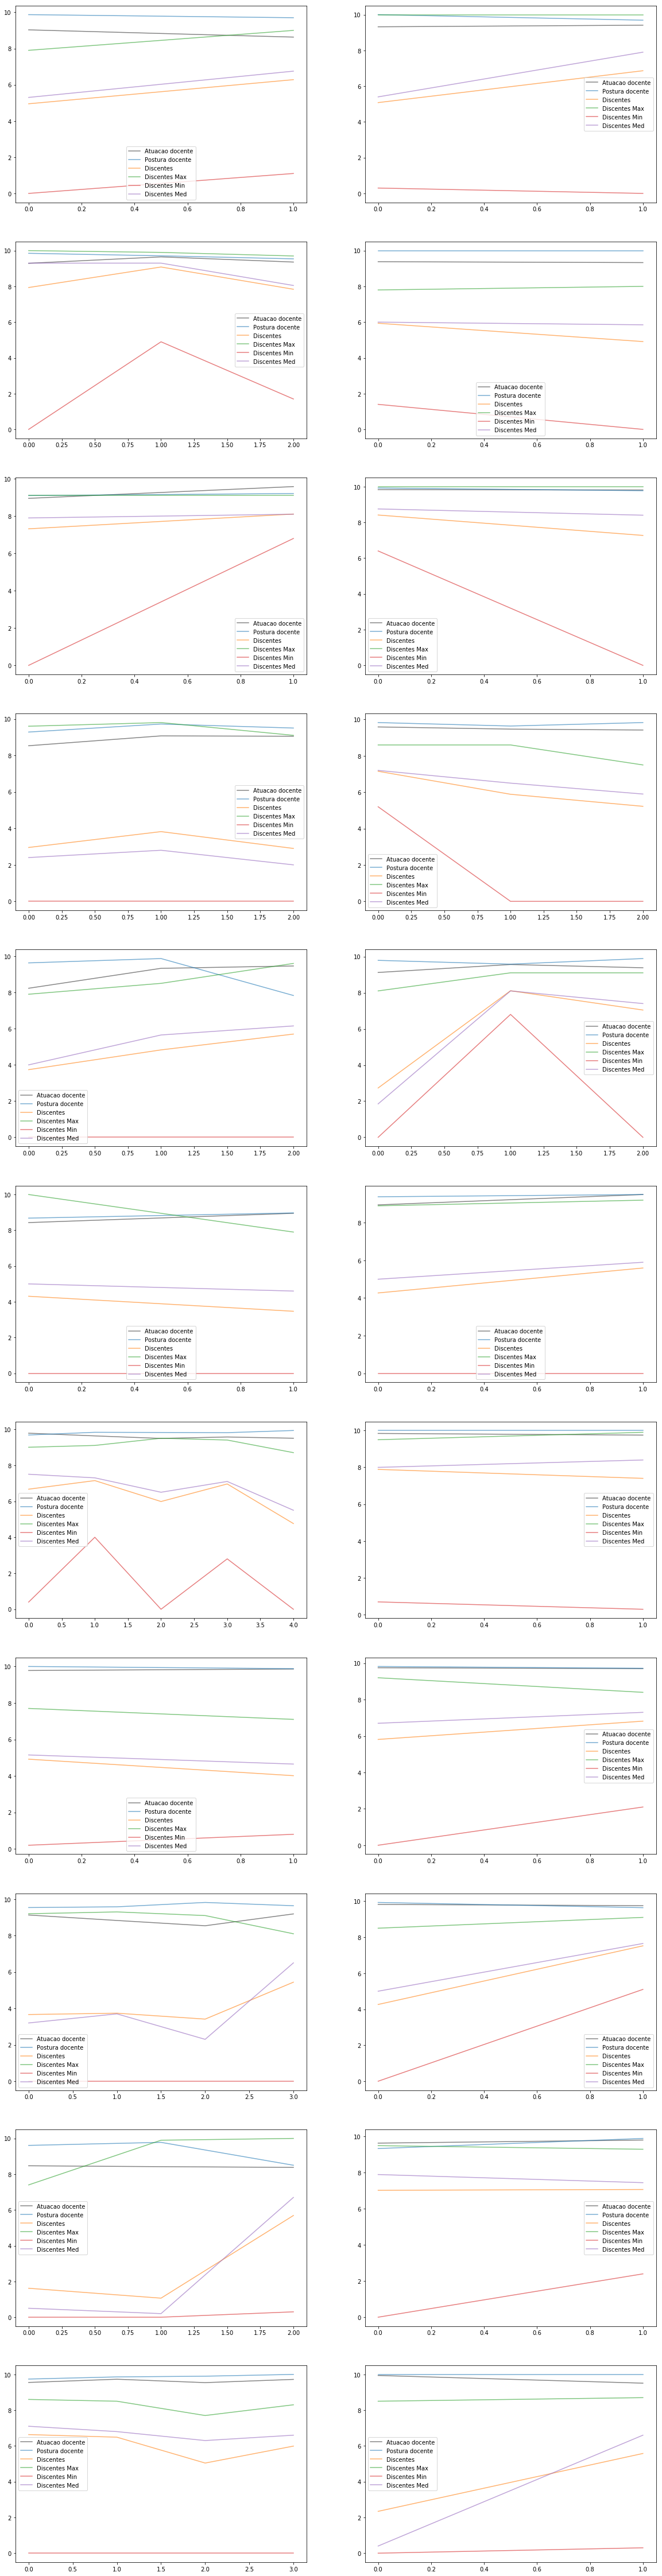

In [6]:
fig = plt.figure(figsize=(20, 150))
i = 0
for docente in avaliacoes.id_docente.unique():
    a = avaliacoes[avaliacoes.id_docente == docente]
    x = range(len(a))
    if(len(x) < 2):
        continue
    i += 1
    ax = fig.add_subplot(20, 2, i)
    ax.plot(x, a.atuacao_profissional_media, alpha=0.6, label='Atuacao docente', color='#333333')
    ax.plot(x, a.postura_profissional_media, alpha=0.6, label='Postura docente')
    ax.plot(x, a.media_discentes, alpha=0.6, label='Discentes')
    ax.plot(x, a.nota_max, alpha=0.6, label='Discentes Max')
    ax.plot(x, a.nota_min, alpha=0.6, label='Discentes Min')
    ax.plot(x, a.nota_med, alpha=0.6, label='Discentes Med')

    ax.legend(loc='best')
    #ax.title('Professor ' + i)
    #ax.xlabel('Turmas')
    #ax.ylabel('Nota')


#a['atuacao_profissional_media'].plot(kind='hist', bins=30, alpha=0.3)

#plt.hist(a.atuacao_profissional_media, alpha=0.4, label='atuacao docente', color='#333333')
#plt.hist(a.postura_profissional_media, alpha=0.4, label='postura docente')
#plt.hist(a.media_discentes, alpha=0.4, label='media discentes', color='red')

#plt.show()